## Oscillating Growth Example

Use this template to solve the oscillating growth problem using both your own euler method and scipy odeint.

$\frac{dy}{dx}=y[1-sin(\omega t)]$

Import modules

In [10]:
from numpy import zeros_like,  sin, pi, linspace, exp, cos
import numpy as np

from scipy.integrate import odeint

from matplotlib.pyplot import plot,xlabel,ylabel,legend,show


Euler's method to solve ODE.

 First create a python function to apply Euler's method to any function by looping over independent variable to fill in the dependent variable. Think of Euler in the form:

$
y\left(t\right)=y\left(t-\Delta t\right)\:+\:y^{\prime}\left(t-\Delta t\right)  \Delta t 
$
<br>
$
y\left(t\right)=y\left(t-\Delta t\right)+f\left[t-\Delta t,y\left(t-\Delta t\right)\right]\Delta t
$

Or, if we create a sequence of values for t and y:

$t_i = t_0 + i\Delta t, i = 1,n$
<br>
$ y_i = y(t_i)$

we can write Euler's method as:

$
y_i=y_{i-1} +f(t_{i-1},y_{i-1})\Delta t, i = 1, n
$

As inputs for your euler fuction, take the name of the function, the initial value, and the array of times to compute the solution (ie the $t_i$ above). The function computes and returns the array of $y_i$.
See the template below, fill in the blanks. Note that the inputs mimic odeint.

In [11]:
def euler(f,y0,t):

    # create array to hold the solution
    y = zeros_like(t)

    # set i.c. ie fill the first value of soln array, y
    y[0] = y0

    # use for loop to fill in the rest of the solution
    # hint: use len(t) to find number of values
    for i in range(1, len(t)):
       dt = t[i] - t[i-1] # don't assume dt is constant, get from t array.
       y[i] = y[i-1] + f(t[i-1], y[i-1])*dt

    return y


Our oscillating growth function. Assume the value of $\omega$ is specified outside the function.

In [12]:
def W(t,y):
    dydt = y*(1-sin(omega*t))
    return dydt

set initial conditions and time array for solution

In [13]:
# generate times from 0 to 1 at dt = 0.1
t0 = 0
y0 = 1 # initial condition

tend = 1 # sec
time_step = 0.1 # sec
t = np.arange(t0, tend+time_step, time_step)
omega = 4*pi


Solve two ways

In [14]:
# Solve with euler
y_euler = euler(W,y0,t)

# Solve with odeint
#y_odeint = odeint(W,y0,t, tfirst=True)


Plot and compare

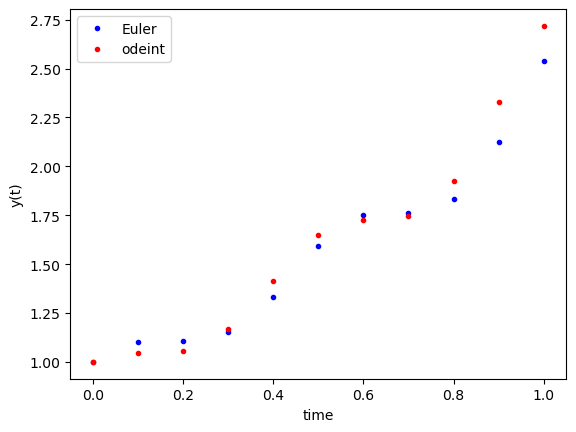

In [15]:
# plot
#plot(t,y_analytic,'kx',linewidth=2,label='Analytic')
plot(t,y_euler,'b.',linewidth=2,label='Euler')
plot(t,y_odeint,'r.',linewidth=2,label='odeint')
xlabel('time')
ylabel('y(t)')
legend()
show()
